<a href="https://colab.research.google.com/github/AlfiRam/Computer-Vision-Final-Project-Fire-Detection/blob/main/Group3ForestFireSegmentationUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forest Fire Segmentation using UNet
1. Anugrah Yuwan Atmadja - 20/454527/PA/19558
2. Audrey Shafira Fattima - 21/472678/PA/20320
3. Aulia Azmi - 21/475032/PA/20512
4. Muhammad Alfi Ramadhan - 21/472839/PA/20345


1. Run the following code to import libraries and load the Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

from google.colab.patches import cv2_imshow

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/ComputerVision2023/Final Project/UNetAv2.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Run the following code to create the preprocessing and detecting function

In [ ]:
def preprocess_image(image):
    # Apply preprocessing steps to the image

    # Example preprocessing steps:
    image_size = 64
    image = cv2.resize(image, (image_size, image_size))
    image = image / 255.0  # Normalize the image to the range [0, 1]

    return image

def detect(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is successfully loaded
    if image is not None:
        # Preprocess the image
        preprocessed_image = preprocess_image(image)

        # Perform prediction using the preprocessed image
        result = model.predict(np.expand_dims(preprocessed_image, axis=0))

        return result, preprocessed_image
    else:
        print(f"Failed to load the image: {image_path}")
        return None, None


3. Put your image path down below

In [ ]:
image_path = '/content/drive/My Drive/ComputerVision2023/Final Project/img5.jpg'

4. Run the following code to segment the fire region

In [ ]:
# Perform prediction using the detect function
result, preprocessed_image = detect(image_path)

1/1 [==============================] - 0s 35ms/step


5. Run the following code to see the result

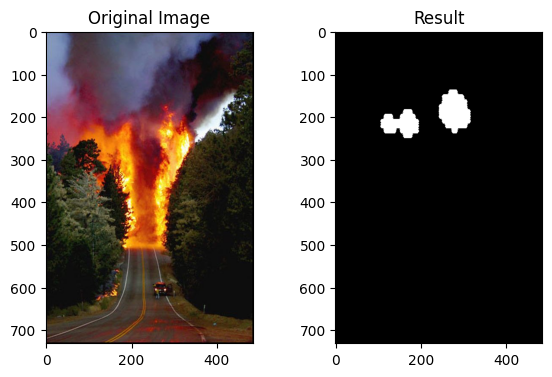

In [ ]:
image = cv2.imread(image_path)

h, w, c = image.shape

h = int(h)
w = int(w)

if result is not None and preprocessed_image is not None:
    # Convert the result to binary mask
    mask = result[0] > 0.5

    mask = mask.astype(np.uint8)

    dim = (w, h)

    mask = cv2.resize(mask, dim, cv2.INTER_AREA)

    # Convert the preprocessed image to uint8 data type
    preprocessed_image_uint8 = (preprocessed_image * 255).astype(np.uint8)

    # Create a figure and axes
    fig, axs = plt.subplots(1, 2)

    # Plot the original image
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')

    # Plot the result
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Result')

    # Adjust the spacing between subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Show the plot
    plt.show()

6. Run the following codes to see the performance result

In [ ]:
import cv2
import numpy as np

def intersection_over_union(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def dice_coefficient(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    dice = (2.0 * np.sum(intersection)) / (np.sum(y_true) + np.sum(y_pred))
    return dice

def compute_performance_metrics(y_true, y_pred):
    y_true = np.asarray(y_true).astype(bool)
    y_pred = np.asarray(y_pred).astype(bool)

    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)

    dice = (2.0 * np.sum(intersection)) / (np.sum(y_true) + np.sum(y_pred))

    accuracy = np.mean(y_true == y_pred)
    precision = np.sum(intersection) / np.sum(y_pred)
    recall = np.sum(intersection) / np.sum(y_true)
    f1_score = (2.0 * precision * recall) / (precision + recall)

    metrics = {
        'IoU': iou,
        'Dice': dice,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

    return metrics



In [ ]:
# # Perform prediction using the detect function
# result, preprocessed_image = detect(image_path)

# # Convert prediction result to binary array
# threshold = 0.5
# y_pred = (result > threshold).astype(np.uint8)

# # Load the ground truth mask image
# mask_path = '/content/drive/My Drive/ComputerVision2023/Final Project/mask5.jpg'
# print(f"Loading ground truth mask from: {mask_path}")
# mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# if mask is None:
#     print(f"Failed to load the ground truth mask: {mask_path}")
# else:
#     print("Ground truth mask loaded successfully.")

#     # Resize the predicted mask to match the dimensions of the ground truth mask
#     dim = (w,h)
#     resized_pred_mask = cv2.resize(y_pred[0], dim, interpolation=cv2.INTER_AREA)

#     # Threshold the ground truth mask image to convert it to a binary array
#     threshold = 128
#     y_true = (mask > threshold).astype(np.uint8)

#     # Compute performance metrics
#     metrics = compute_performance_metrics(y_true, resized_pred_mask)
#     print(metrics)
